# NFT Analysis 

## Objectives - NFT investors and buyers may want to know:
* What types of NFTs are higher valued than others?
* What types of NFTs have their values going up?​ 
* Can we build a financial/ML model to forecast the price of NFTs encrypted by ourselves? 
* Which NFT cryptocurrency is trending recently?
* Why could some NFTs be sold at a huge price? possible feature extractions? 
* What types of NFTs are most encrypted by the general public?
* What are the main differences in NFT transactions among some major marketplaces?
* What's the best listing duration for a timed auction?
* What’s the most acceptable price range for our listings to finish a deal?
* How do you predict the future of the NFT transactions?
* Is it possible to build anomaly detection from previous NFT transactions? 

In [3]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import DatetimeTickFormatter

output_notebook()

Loading BokehJS ...

# Source dataset 

## OpenSea

### Fetch data from OpenSea using API's

OpenSea is the largest marketplace for trading NFT's. OpenSea also provides api's for developers (https://docs.opensea.io/reference/api-overview) to fetch data about models, assets, collections and transaction events. Using this api reference, collections info for the top 10 NFT's traded all-time was extracted. 

In [4]:
top10 = ['cryptopunks','boredapeyachtclub','decentraland','mutant-ape-yacht-club','art-blocks','sandbox','clonex','rarible','azuki','decentraland-wearables']
collectionList = []
for i in top10:
    url = "https://api.opensea.io/api/v1/collection/" + i + ""
    headers ={"Accept": "application/json"}
    response = requests.request("GET", url, headers=headers)
    collection = response.json()['collection']
    stats = collection['stats']
    df = pd.json_normalize(stats, max_level=1)
    df.insert(0, "name", collection['name'],False)
    collectionList.append(df)
    
result = pd.concat(collectionList, ignore_index=True)

result.head(10)

,name,one_day_volume,one_day_change,one_day_sales,one_day_average_price,seven_day_volume,seven_day_change,seven_day_sales,seven_day_average_price,thirty_day_volume,...,thirty_day_average_price,total_volume,total_sales,total_supply,count,num_owners,average_price,num_reports,market_cap,floor_price
0,CryptoPunks,413.720000,0.933271,5.0,82.744000,13016.880000,0.373620,61.0,213.391475,59412.666600,...,98.040704,842039.842849,1.915600e+04,9999.0,9999.0,3388,43.956977,18,2.133701e+06,NaN
1,Bored Ape Yacht Club,831.059900,-0.165083,8.0,103.882487,6985.519900,-0.306163,65.0,107.469537,69561.655500,...,107.680581,395982.796580,2.464200e+04,10000.0,10000.0,6313,16.069426,287,1.074695e+06,98.000000
2,Decentraland,286.429166,2.490620,41.0,6.986077,1513.889397,-0.449300,166.0,9.119816,10648.700027,...,9.878200,301399.188570,1.801300e+04,97293.0,97293.0,6702,16.732315,4,8.872942e+05,4.689000
3,Mutant Ape Yacht Club,938.042131,0.319847,41.0,22.879076,4791.301012,-0.408230,219.0,21.878087,49288.632335,...,22.414112,243211.016300,2.578200e+04,17959.0,17959.0,11748,9.433365,19,3.929086e+05,18.990000
4,Art Blocks Curated,126.564600,-0.651957,73.0,1.733762,2523.010425,0.232657,1120.0,2.252688,10149.958078,...,2.340318,230468.356993,5.265000e+04,52332.0,52332.0,11023,4.377367,0,1.178877e+05,NaN
5,The Sandbox,254.749000,-0.546799,67.0,3.802224,3275.042470,-0.115501,768.0,4.264378,17931.434394,...,4.204322,157557.506823,8.019900e+04,147560.0,147560.0,19713,1.964582,9,6.292516e+05,3.550000
6,CLONE X - X TAKASHI MURAKAMI,944.884000,-0.231046,48.0,19.685083,6494.449788,-0.501771,336.0,19.328720,62526.998862,...,16.115206,124866.635436,1.219200e+04,18877.0,18877.0,8290,10.241686,16,3.648682e+05,14.080000
7,Rarible,6.982200,0.423341,2039.0,0.003424,143.175350,0.351597,18954.0,0.007554,640.790189,...,0.021940,99400.462774,2.067183e+09,311618.0,311618.0,206574,0.000048,20,2.353910e+03,NaN
8,Azuki,2278.652120,-0.324303,117.0,19.475659,11738.161652,-0.007751,753.0,15.588528,101013.017879,...,8.044359,113178.855442,1.806400e+04,10000.0,10000.0,5402,6.265437,23,1.558853e+05,14.300000
9,Decentraland Wearables,2.764219,137.210958,15.0,0.184281,11.436439,0.181594,47.0,0.243328,29.166460,...,0.142275,97312.533334,2.311100e+04,71117.0,71117.0,10349,4.210659,1,1.730479e+04,0.002138


In [5]:
result.describe()

,one_day_volume,one_day_change,one_day_sales,one_day_average_price,seven_day_volume,seven_day_change,seven_day_sales,seven_day_average_price,thirty_day_volume,thirty_day_change,...,thirty_day_average_price,total_volume,total_sales,total_supply,count,num_owners,average_price,num_reports,market_cap,floor_price
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,7.000000
mean,608.384734,13.945885,245.400000,26.137607,5049.286643,-0.064925,2248.900000,39.354411,38120.302033,1.023921,...,26.888202,260541.719510,2.067457e+08,74675.500000,74675.500000,28950.200000,11.325186,39.700000,5.776151e+05,21.944448
std,690.290033,43.320813,631.118619,36.761927,4541.249894,0.339215,5881.122388,68.960269,34829.909731,2.281944,...,40.722489,226739.696088,6.536910e+08,95076.851426,95076.851426,62575.339391,12.744066,87.290129,6.566343e+05,34.232134
min,2.764219,-0.651957,5.000000,0.003424,11.436439,-0.501771,47.000000,0.007554,29.166460,-0.271723,...,0.021940,97312.533334,1.219200e+04,9999.000000,9999.000000,3388.000000,0.000048,0.000000,2.353910e+03,0.002138
25%,158.610700,-0.300989,21.500000,2.250877,1766.169654,-0.382714,90.250000,2.755610,10274.643565,0.013008,...,2.806319,116100.800440,1.833700e+04,11989.750000,11989.750000,6410.250000,4.252336,5.250000,1.273871e+05,4.119500
50%,350.074583,0.077382,44.500000,13.230868,4033.171741,-0.061626,277.500000,12.354172,33610.033365,0.211618,...,8.961280,194012.931908,2.387650e+04,35604.500000,35604.500000,9319.500000,7.849401,17.000000,3.788884e+05,14.080000
75%,911.296573,0.805789,71.500000,22.080578,6862.752372,0.219891,764.250000,21.240745,61748.415797,0.819904,...,20.839385,286852.145502,4.593300e+04,90749.000000,90749.000000,11566.750000,14.612491,19.750000,8.227836e+05,16.645000
max,2278.652120,137.210958,2039.000000,103.882487,13016.880000,0.373620,18954.000000,213.391475,101013.017879,7.303006,...,107.680581,842039.842849,2.067183e+09,311618.000000,311618.000000,206574.000000,43.956977,287.000000,2.133701e+06,98.000000


### Top 10 NFT's market cap

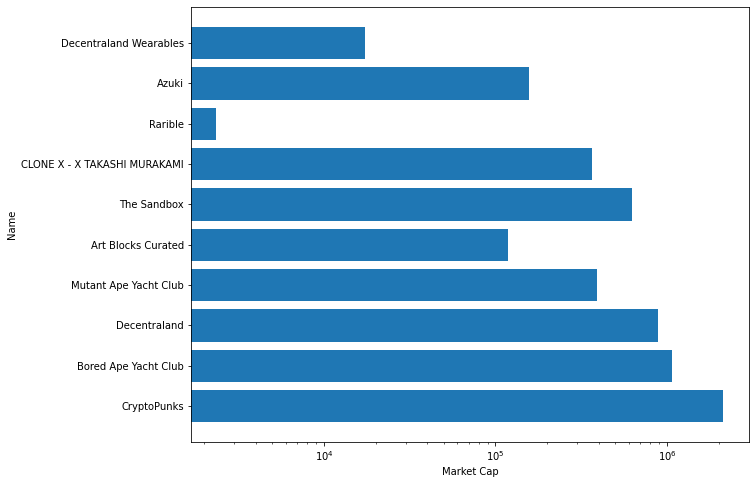

In [120]:
plt.figure(figsize=(10,8))
plt.barh(result['name'], result['market_cap'])
plt.xlabel('Market Cap')
plt.ylabel('Name')
plt.xscale('log')
plt.show()

### Store results as .csv

In [7]:
result.to_csv("../nft_stats_nonfungible/top10_collection.csv")

## NonFungible 

### Fetch data from nonfungible.com 

NonFungible is a platform which tracks real-time transactions of NFT from various marketsplaces. It also provides market history, trends, and stats on collections of multiple categories that are traded across various block-chain technologies.   


In [8]:
sales_avg_usd = pd.read_csv("../nft_stats_nonfungible/sales_avg_usd.csv", index_col=0)
sales_primary_usd = pd.read_csv("../nft_stats_nonfungible/sales_primary_usd.csv", index_col=0)
sales_primary = pd.read_csv("../nft_stats_nonfungible/sales_primary.csv", index_col=0)
sales_secondary_usd = pd.read_csv("../nft_stats_nonfungible/sales_secondary_usd.csv", index_col=0)
sales_secondary = pd.read_csv("../nft_stats_nonfungible/sales_secondary.csv", index_col=0)
sales_total_usd = pd.read_csv("../nft_stats_nonfungible/sales_total_usd.csv", index_col=0)
sales_total = pd.read_csv("../nft_stats_nonfungible/sales_total.csv", index_col=0)
unique_buyers = pd.read_csv("../nft_stats_nonfungible/unique_buyers.csv", index_col=0)
unique_sellers = pd.read_csv("../nft_stats_nonfungible/unique_sellers.csv", index_col=0)
wallets = pd.read_csv("../nft_stats_nonfungible/wallets.csv", index_col=0)

df_list = [sales_avg_usd, sales_primary_usd, sales_primary, sales_secondary_usd, sales_secondary, sales_total_usd, sales_total, unique_buyers, unique_sellers,wallets]

#concat on date
df_history = pd.concat(df_list, axis=1)

#reset the index and convert Date column to datetime
df_history.reset_index(inplace=True)
df_history['Date'] = pd.to_datetime(df_history['Date'])
df_history.head()

,Date,Average USD,Primary Sales USD,Primary Sales,Secondary Sales USD,Secondary Sales,Sales USD,Number of Sales,Unique Buyers,Unique Sellers,Active Market Wallets
0,2017-06-22,NaN,0.0,0,0.00,0,0.00,0,0,0,0.0
1,2017-06-23,53.70,0.0,0,1020.30,19,1020.30,19,8,2,8.0
2,2017-06-24,56.53,0.0,0,2261.14,40,2261.14,40,13,11,21.0
3,2017-06-25,52.43,0.0,0,2778.69,53,2778.69,53,18,15,28.0
4,2017-06-26,47.81,0.0,0,3203.32,67,3203.32,67,20,19,34.0


In [9]:
# find correlation

df_history.corr()

,Average USD,Primary Sales USD,Primary Sales,Secondary Sales USD,Secondary Sales,Sales USD,Number of Sales,Unique Buyers,Unique Sellers,Active Market Wallets
Average USD,1.000000,0.798624,0.689584,0.827516,0.656318,0.874957,0.678355,0.703399,0.644063,0.696561
Primary Sales USD,0.798624,1.000000,0.641023,0.693942,0.627278,0.831606,0.638739,0.651694,0.620166,0.647942
Primary Sales,0.689584,0.641023,1.000000,0.906476,0.973727,0.889148,0.994145,0.964868,0.942729,0.963288
Secondary Sales USD,0.827516,0.693942,0.906476,1.000000,0.937465,0.976967,0.927173,0.961058,0.943186,0.958860
Secondary Sales,0.656318,0.627278,0.973727,0.937465,1.000000,0.908976,0.992631,0.992125,0.991645,0.993341
Sales USD,0.874957,0.831606,0.889148,0.976967,0.908976,1.000000,0.904435,0.934410,0.911282,0.931646
Number of Sales,0.678355,0.638739,0.994145,0.927173,0.992631,0.904435,1.000000,0.984181,0.972172,0.983918
Unique Buyers,0.703399,0.651694,0.964868,0.961058,0.992125,0.934410,0.984181,1.000000,0.991855,0.999813
Unique Sellers,0.644063,0.620166,0.942729,0.943186,0.991645,0.911282,0.972172,0.991855,1.000000,0.993997
Active Market Wallets,0.696561,0.647942,0.963288,0.958860,0.993341,0.931646,0.983918,0.999813,0.993997,1.000000


In [10]:
df_history.to_csv("../nft_stats_nonfungible/market_history.csv")

# Data Preperation 


## Handling Outlier

<AxesSubplot:>

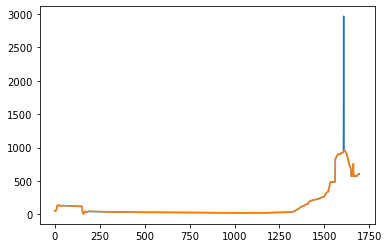

In [121]:
df_history['Average USD'].plot()
df_history[df_history['Average USD'] > 2000]
df_history[1603:1611]['Average USD']

#drop the outlier record (average USD too high for November 15th 2021)

df_clean = df_history[df_history['Average USD'] < 2000]
df_clean.head()

## show seperate figures of data cleaning
df_clean['Average USD'].plot()

## Dimensionality Reduction 

In [ ]:
# check for covariance as well

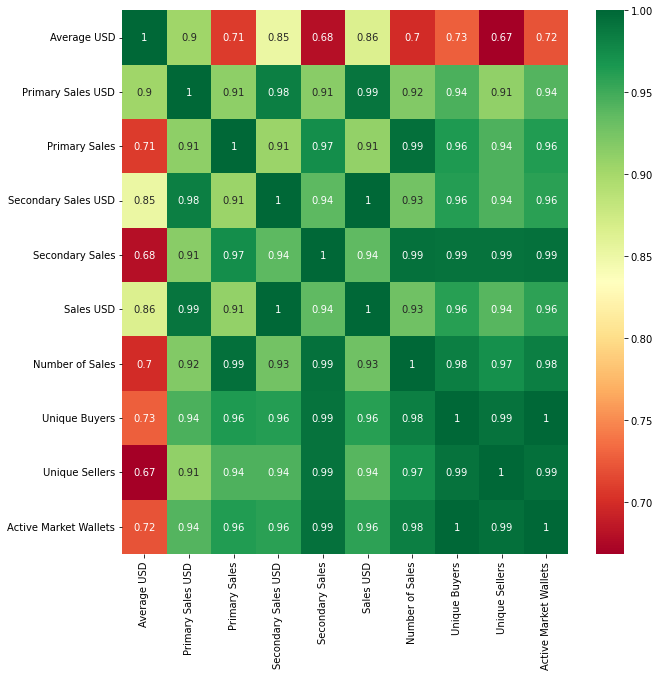

In [45]:

plt.figure(figsize=(10,10))

#plot in heatmap
g = sns.heatmap(df_clean.corr(), annot=True, cmap='RdYlGn')

## Data Visualization (EDA)

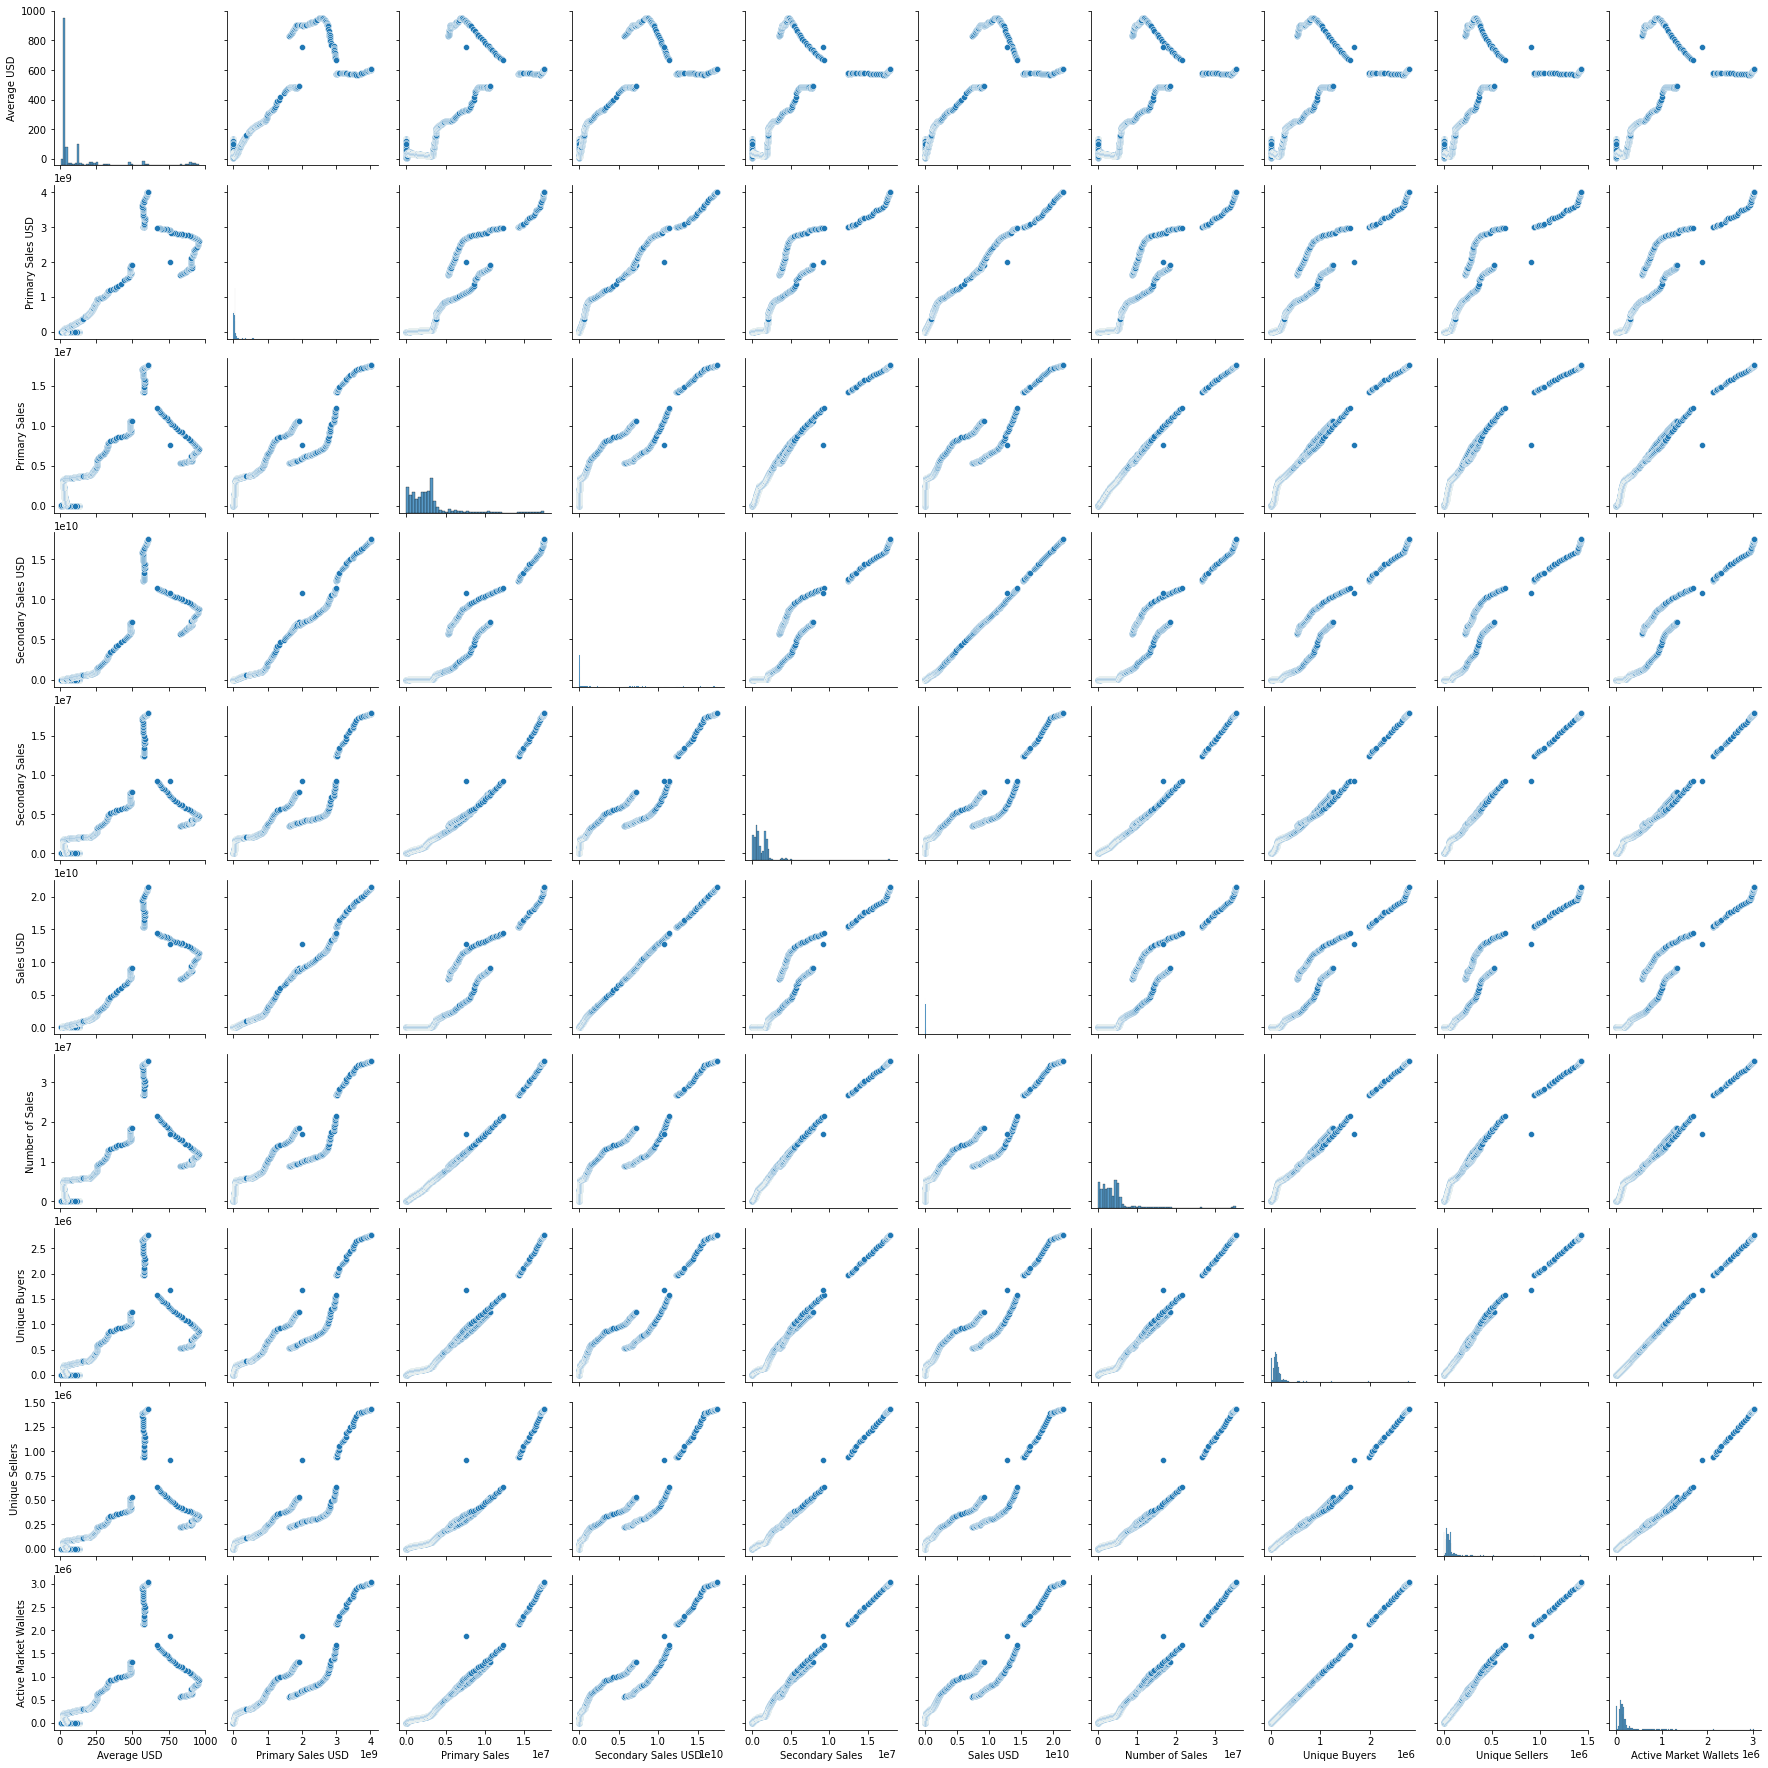

In [46]:
#using seaborn to plot

sns.pairplot(df_clean)

In [51]:
# use Bokeh to display primary and secondary sales in USD over time 
TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p1 = figure(title="Price History", x_axis_type='datetime',tools=TOOLS,plot_width=900, plot_height=700)
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price USD'
p1.line(x= df_clean['Date'], y=df_clean['Primary Sales USD'], legend_label="Primary",color='red')
p1.line(x= df_clean['Date'], y=df_clean['Secondary Sales USD'], legend_label="Secondary",color='blue')
show(p1)

In [52]:
# use Bokeh to display primary and secondary sales in USD over time 
TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p1 = figure(title="Sales History", x_axis_type='datetime',tools=TOOLS,plot_width=900, plot_height=700)
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Sales'
p1.line(x= df_clean['Date'], y=df_clean['Primary Sales'], legend_label="Primary",color='red')
p1.line(x= df_clean['Date'], y=df_clean['Secondary Sales'], legend_label="Secondary",color='blue')
show(p1)

<AxesSubplot:xlabel='Average Price USD', ylabel='Frequency'>

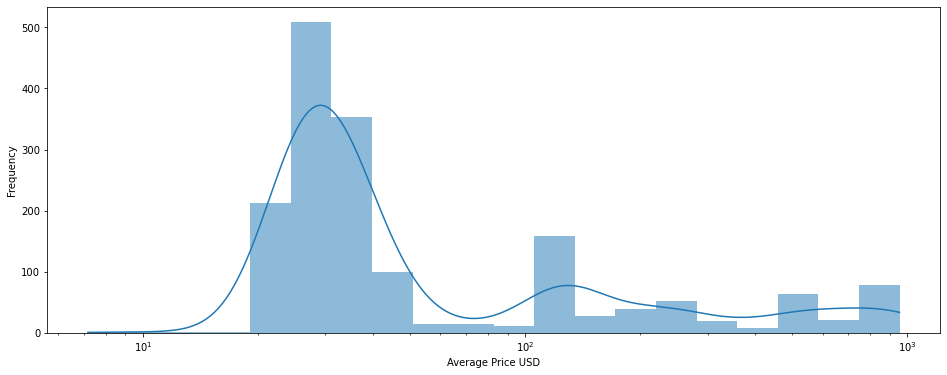

In [112]:
# Distribution of average price 
# plt.figure(figsize=(10,8))
# plt.hist(df_clean['Average USD'], bins=30 )
# plt.xlabel('Average Price USD')
# plt.ylabel('Frequency')
# plt.yscale("symlog")
# plt.grid()
# plt.show()

plt.figure(figsize=(16, 6))
plt.xlabel('Average Price USD')
plt.ylabel('Frequency')
sns.histplot(df_clean['Average USD'],  kde=True, linewidth =0, log_scale=10)
